<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%206/Reproduce%20SKLearn%20Code/5_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 6  Hierarchical Clustering

# Pengelompokan **Hirarki Ward** Terstruktur pada Gambar Koin

Compute structured hierarchical clustering...
Elapsed time: 0.789s
Number of pixels: 4697
Number of clusters: 27


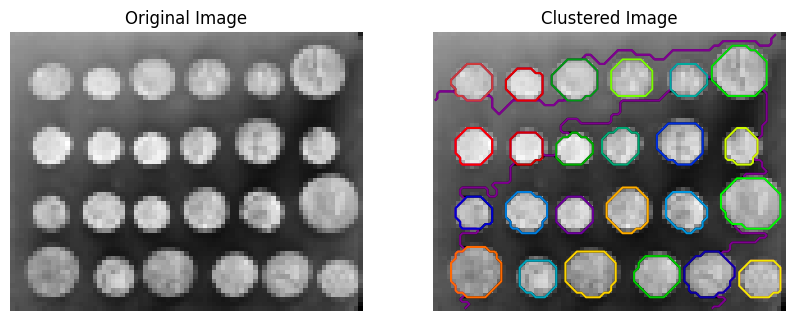

In [2]:
# Membuat data
from skimage.data import coins  # Mengimpor fungsi coins() dari modul skimage.data

orig_coins = coins()  # Mendapatkan citra koin asli

import numpy as np  # Mengimpor pustaka NumPy dengan alias np
from scipy.ndimage import gaussian_filter  # Mengimpor fungsi gaussian_filter dari modul scipy.ndimage
from skimage.transform import rescale  # Mengimpor fungsi rescale dari modul skimage.transform

# Menghaluskan citra koin asli menggunakan filter Gaussian dengan sigma 2
smoothened_coins = gaussian_filter(orig_coins, sigma=2)

# Merescale citra hasil penyamaran dengan faktor 0.2 tanpa anti-aliasing, dan menggunakan mode 'reflect' untuk handling perbatasan
rescaled_coins = rescale(
    smoothened_coins,
    0.2,
    mode="reflect",
    anti_aliasing=False,
)

X = np.reshape(rescaled_coins, (-1, 1))  # Mengubah citra yang sudah di-rescale menjadi array 1 dimensi

from sklearn.feature_extraction.image import grid_to_graph  # Mengimpor fungsi grid_to_graph dari modul sklearn.feature_extraction.image

# Menghasilkan grafik koneksi dari bentuk citra yang telah di-rescale
connectivity = grid_to_graph(*rescaled_coins.shape)

import time as time  # Mengimpor modul time dengan alias time

from sklearn.cluster import AgglomerativeClustering  # Mengimpor kelas AgglomerativeClustering dari modul sklearn.cluster

print("Compute structured hierarchical clustering...")  # Mencetak pesan

st = time.time()  # Memulai penghitungan waktu
n_clusters = 27  # Jumlah klaster yang diinginkan
ward = AgglomerativeClustering(  # Membuat objek ward dari kelas AgglomerativeClustering
    n_clusters=n_clusters,  # Jumlah klaster
    linkage="ward",  # Metode penghubung
    connectivity=connectivity  # Grafik koneksi
)
ward.fit(X)  # Melatih model pengelompokan hirarkis pada data X
label = np.reshape(ward.labels_, rescaled_coins.shape)  # Mengubah label pengelompokan ke bentuk aslinya
print(f"Elapsed time: {time.time() - st:.3f}s")  # Mencetak waktu yang diperlukan untuk melatih model
print(f"Number of pixels: {label.size}")  # Mencetak jumlah piksel dalam citra
print(f"Number of clusters: {np.unique(label).size}")  # Mencetak jumlah klaster yang dihasilkan

import matplotlib.pyplot as plt  # Mengimpor modul matplotlib.pyplot dengan alias plt

# Membuat subplot dengan 1 baris dan 2 kolom
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan citra asli di subplot pertama
ax[0].imshow(rescaled_coins, cmap=plt.cm.gray)
ax[0].set_title("Original Image")  # Menentukan judul untuk subplot pertama
ax[0].axis("off")  # Menonaktifkan sumbu pada subplot pertama

# Menampilkan citra asli di subplot kedua dan menambahkan kontur untuk setiap klaster
ax[1].imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    ax[1].contour(
        label == l,
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
ax[1].set_title("Clustered Image")  # Menentukan judul untuk subplot kedua
ax[1].axis("off")  # Menonaktifkan sumbu pada subplot kedua

plt.show()  # Menampilkan plot yang sudah dibuat


Kode di atas adalah contoh implementasi pengelompokan hirarkis terstruktur pada citra menggunakan metode Ward. Pertama-tama, citra koin asli diambil menggunakan fungsi coins() dari modul skimage.data. Kemudian, citra tersebut dihaluskan dengan filter Gaussian dan direscale menggunakan faktor 0.2 tanpa anti-aliasing. Data citra kemudian diubah menjadi bentuk yang sesuai untuk analisis menggunakan algoritma pengelompokan. Grafik koneksi dibuat dari citra yang telah di-rescale, dan proses pengelompokan hirarkis dilakukan menggunakan algoritma Agglomerative Clustering dengan metode penghubung Ward.

Hasil pengelompokan kemudian direkonstruksi ke dalam bentuk citra yang sama dengan aslinya, dan informasi waktu yang diperlukan untuk proses tersebut dicetak. Selain itu, jumlah piksel dalam citra dan jumlah klaster yang dihasilkan juga dicetak. Akhirnya, citra asli ditampilkan di subplot pertama dan citra yang telah dikelompokkan ditampilkan di subplot kedua bersama dengan kontur yang menunjukkan batas-batas klaster. Semua subplot ditampilkan dalam satu figur.

# Pengelompokan hierarkis: bangsal terstruktur vs bangsal tidak terstruktur

In [10]:
import time as time

# Import mpl_toolkits.mplot3d diperlukan
# untuk proyeksi 3D agar berfungsi dengan matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

In [11]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
# Membuat data "swiss roll" dengan noise
X, _ = make_swiss_roll(n_samples, noise=noise)
# Merapikan data agar lebih tipis
X[:, 1] *= 0.5

In [12]:
from sklearn.cluster import AgglomerativeClustering

print("Menghitung klaster hirarkis tanpa struktur...")
st = time.time()
# Melakukan klastering hirarkis tanpa memperhitungkan struktur data
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Waktu yang diperlukan: {elapsed_time:.2f}s")
print(f"Jumlah titik data: {label.size}")

Menghitung klaster hirarkis tanpa struktur...
Waktu yang diperlukan: 0.25s
Jumlah titik data: 1500


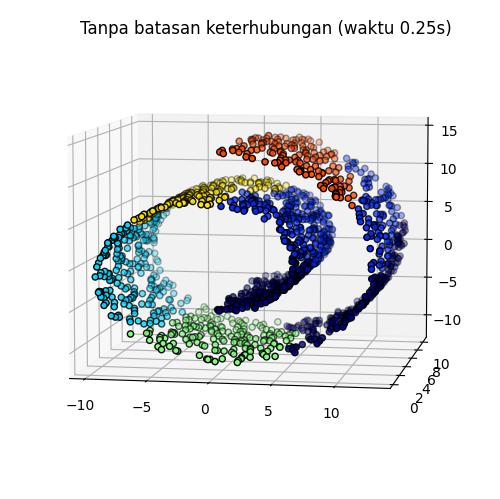

In [13]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Tanpa batasan keterhubungan (waktu {elapsed_time:.2f}s)")

Visualisasi output dalam kode tersebut adalah representasi dari klastering data "swiss roll" menggunakan algoritma klastering hirarkis dengan dan tanpa memperhitungkan struktur keterhubungan antar data.

1. Tanpa Batasan Keterhubungan
- Pada visualisasi ini, setiap titik data dari "swiss roll" direpresentasikan dalam ruang tiga dimensi.
- Titik-titik tersebut diwarnai berdasarkan klaster tempat mereka berada setelah proses klastering tanpa mempertimbangkan struktur keterhubungan antar data.
- Warna-warna yang berbeda menunjukkan klaster yang berbeda.
- Tanpa mempertimbangkan struktur keterhubungan, klaster mungkin terbentuk di area yang berjauhan dalam ruang tiga dimensi.

In [14]:
from sklearn.neighbors import kneighbors_graph

# Membangun graf keterhubungan menggunakan 10 tetangga terdekat
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

In [15]:
print("Menghitung klaster hirarkis terstruktur...")
st = time.time()
# Melakukan klastering hirarkis dengan memperhitungkan keterhubungan data
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Waktu yang diperlukan: {elapsed_time:.2f}s")
print(f"Jumlah titik data: {label.size}")

Menghitung klaster hirarkis terstruktur...
Waktu yang diperlukan: 0.09s
Jumlah titik data: 1500


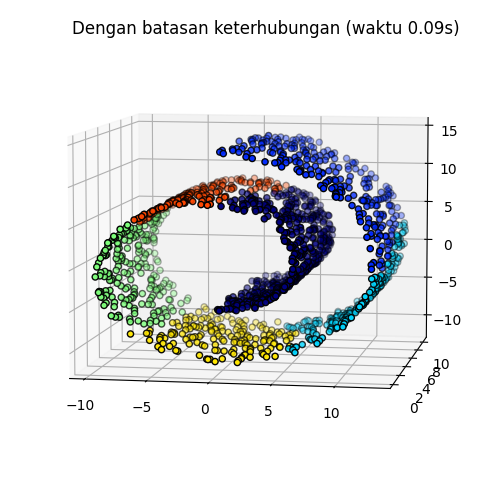

In [16]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"Dengan batasan keterhubungan (waktu {elapsed_time:.2f}s)")

plt.show()

Visualisasi output dalam kode tersebut adalah representasi dari klastering data "swiss roll" menggunakan algoritma klastering hirarkis dengan dan tanpa memperhitungkan struktur keterhubungan antar data.

1. Dengan Batasan Keterhubungan
- Pada visualisasi ini, juga terdapat representasi ruang tiga dimensi dari data "swiss roll".
- Namun, klastering dilakukan dengan mempertimbangkan struktur keterhubungan antar data, yang diwakili oleh graf keterhubungan yang telah dibangun sebelumnya.
- Hasil klastering menunjukkan bahwa titik-titik data yang saling terhubung lebih dekat cenderung tergabung dalam klaster yang sama.
- Dengan mempertimbangkan keterhubungan antar data, klaster mungkin memiliki bentuk yang lebih sesuai dengan struktur sebenarnya dari data, yang bisa saja tidak terlihat dengan jelas dalam representasi tiga dimensi.

# Aglomerasi fitur vs. seleksi univariat

In [17]:
import shutil
import tempfile

import matplotlib.pyplot as plt
import numpy as np
from joblib import Memory
from scipy import linalg, ndimage

from sklearn import feature_selection
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

Code di atas adalah contoh penggunaan beberapa pustaka dalam lingkungan Python untuk analisis data dan pemodelan. Berikut adalah penjelasan singkat tentang setiap bagian dari kode tersebut:

1. import shutil: Pustaka shutil digunakan untuk operasi-operasi pada file dan direktori di Python, seperti menyalin, memindahkan, atau menghapus file.

2. import tempfile: Modul tempfile digunakan untuk bekerja dengan file dan direktori sementara dalam Python.

3. import matplotlib.pyplot as plt: Pustaka matplotlib.pyplot adalah salah satu pustaka yang paling umum digunakan untuk membuat visualisasi data dalam Python, khususnya plot-grafik.

4. import numpy as np: NumPy adalah pustaka Python yang digunakan untuk komputasi numerik, khususnya untuk array multidimensi dan operasi matematika yang efisien.

5. from joblib import Memory: Pustaka joblib digunakan untuk caching (penyimpanan sementara) hasil komputasi. Memory adalah kelas di dalamnya yang memungkinkan caching.

6. from scipy import linalg, ndimage: Pustaka scipy adalah kumpulan algoritma dan fungsi matematika dan ilmiah untuk Python. Di sini, kita mengimpor modul linalg (linear algebra) dan ndimage (image processing).

7. from sklearn import feature_selection: Pustaka scikit-learn (atau sklearn) adalah pustaka yang sangat populer untuk machine learning di Python.

8. feature_selection adalah modul di dalamnya yang berisi algoritma-algoritma untuk seleksi fitur (feature selection).

9. from sklearn.cluster import FeatureAgglomeration: Di sini, kita mengimpor kelas FeatureAgglomeration dari modul cluster di scikit-learn. Ini adalah teknik untuk pengelompokan (clustering) fitur-fitur berdasarkan kemiripan mereka.

10. from sklearn.feature_extraction.image import grid_to_graph: Modul feature_extraction di scikit-learn berisi alat-alat untuk mengekstrak fitur dari data. grid_to_graph adalah fungsi di dalamnya yang menghasilkan graf berdasarkan grid data spasial.

11. from sklearn.linear_model import BayesianRidge: Modul linear_model di scikit-learn berisi algoritma-algoritma untuk pemodelan linier. BayesianRidge adalah salah satu algoritma regresi linier Bayesian.

12. from sklearn.model_selection import GridSearchCV, KFold: GridSearchCV adalah kelas di scikit-learn yang digunakan untuk pencarian parameter terbaik dalam model. KFold adalah teknik validasi silang yang membagi data menjadi lipatan-lipatan (folds) untuk pengujian model.

13. from sklearn.pipeline import Pipeline: Pipeline adalah kelas di scikit-learn yang memungkinkan kita untuk menyusun beberapa langkah pemrosesan data dan pemodelan menjadi satu alur kerja (pipeline).

In [18]:
n_samples = 200
size = 40  # image size
roi_size = 15
snr = 5.0
np.random.seed(0)

Kode di atas mendefinisikan beberapa variabel yang akan digunakan dalam analisis data atau eksperimen berikutnya. Mari kita lihat penjelasan untuk setiap variabel:

1. n_samples = 200: Variabel n_samples menentukan jumlah sampel data yang akan digunakan dalam analisis atau eksperimen. Dalam konteks ini, jumlah sampel data adalah 200.

2. size = 40: Variabel size menentukan ukuran gambar (image) yang akan digunakan dalam analisis atau eksperimen. Dalam konteks ini, gambar akan memiliki dimensi size x size, yaitu 40x40 piksel.

3. roi_size = 15: Variabel roi_size menentukan ukuran daerah minat (region of interest) yang akan diambil dari gambar. Dalam konteks ini, daerah minat akan memiliki dimensi roi_size x roi_size, yaitu 15x15 piksel.

4. snr = 5.0: Variabel snr adalah signal-to-noise ratio (SNR), yang merupakan rasio antara kekuatan sinyal dan kekuatan noise dalam data. Dalam konteks ini, SNR adalah 5.0.

5. np.random.seed(0): Fungsi np.random.seed(0) digunakan untuk mengatur seed dari generator bilangan acak NumPy. Ini memastikan bahwa hasil dari operasi acak akan konsisten setiap kali kode dijalankan. Dalam konteks ini, seed diatur menjadi 0.

In [19]:
coef = np.zeros((size, size))
coef[0:roi_size, 0:roi_size] = -1.0
coef[-roi_size:, -roi_size:] = 1.0

X = np.random.randn(n_samples, size**2)
for x in X:  # smooth data
    x[:] = ndimage.gaussian_filter(x.reshape(size, size), sigma=1.0).ravel()
X -= X.mean(axis=0)
X /= X.std(axis=0)

y = np.dot(X, coef.ravel())


Kode di atas melakukan beberapa operasi terkait pembentukan data X dan target y:

1. coef = np.zeros((size, size)):
Membuat matriks koefisien yang berukuran size x size yang diisi dengan nilai nol.

2. coef[0:roi_size, 0:roi_size] = -1.0 dan coef[-roi_size:, -roi_size:] = 1.0:
Mengatur daerah pertama roi_size x roi_size dari matriks koefisien menjadi nilai -1.0 dan daerah terakhir roi_size x roi_size menjadi nilai 1.0. Ini menentukan pola dalam data yang akan dihasilkan.

3. X = np.random.randn(n_samples, size**2):
Membuat matriks data X dengan ukuran n_samples x size^2 yang diisi dengan angka acak dari distribusi normal.

4. for x in X: x[:] = ndimage.gaussian_filter(x.reshape(size, size), sigma=1.0).ravel(): Menghaluskan setiap sampel data dalam X menggunakan filter Gaussian dengan sigma 1.0. Ini membantu dalam menambahkan sedikit kebisingan halus ke dalam data.

5. X -= X.mean(axis=0) dan X /= X.std(axis=0): Standarisasi data X sehingga setiap fitur memiliki rata-rata nol dan standar deviasi satu.

6. y = np.dot(X, coef.ravel()): Menghasilkan target y dengan mengalikan matriks data X dengan matriks koefisien yang telah di-ravel (diratakan) menjadi satu dimensi. Ini menghasilkan hasil yang merupakan kombinasi linear dari fitur-fitur dalam X sesuai dengan koefisien yang ditetapkan sebelumnya.

In [20]:
noise = np.random.randn(y.shape[0])
noise_coef = (linalg.norm(y, 2) / np.exp(snr / 20.0)) / linalg.norm(noise, 2)
y += noise_coef * noise

In [21]:
cv = KFold(2)  # cross-validation generator for model selection
ridge = BayesianRidge()
cachedir = tempfile.mkdtemp()
mem = Memory(location=cachedir, verbose=1)

In [22]:
connectivity = grid_to_graph(n_x=size, n_y=size)
ward = FeatureAgglomeration(n_clusters=10, connectivity=connectivity, memory=mem)
clf = Pipeline([("ward", ward), ("ridge", ridge)])
# Select the optimal number of parcels with grid search
clf = GridSearchCV(clf, {"ward__n_clusters": [10, 20, 30]}, n_jobs=1, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_)
coef_agglomeration_ = coef_.reshape(size, size)

________________________________________________________________________________
[Memory] Calling sklearn.cluster._agglomerative.ward_tree...
ward_tree(array([[-0.451933, ..., -0.675318],
       ...,
       [ 0.275706, ..., -1.085711]]), connectivity=<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None, return_distance=False)
________________________________________________________ward_tree - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.cluster._agglomerative.ward_tree...
ward_tree(array([[ 0.905206, ...,  0.161245],
       ...,
       [-0.849835, ..., -1.091621]]), connectivity=<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None, return_distance=False)
________________________________________________________ward_tree - 0.1s, 0.0min
__________________________________________

Kode di atas menambahkan kebisingan ke dalam target y dan melakukan pemodelan menggunakan algoritma regresi Bayesian Ridge dengan teknik aglomerasi fitur.

Pertama, kebisingan ditambahkan ke dalam target y dengan menghitung koefisien kebisingan berdasarkan norm-2 dari target dan norm-2 dari noise, serta mempertimbangkan signal-to-noise ratio (SNR). Kemudian, kebisingan tersebut dihasilkan dan ditambahkan ke dalam target.

Selanjutnya, dilakukan pemodelan dengan menggunakan algoritma Bayesian Ridge. Langkah pertama dalam pemodelan adalah membuat sebuah kelas KFold untuk teknik validasi silang dengan 2 lipatan. Selanjutnya, teknik aglomerasi fitur dilakukan dengan menggunakan kelas FeatureAgglomeration. Aglomerasi fitur ini menggabungkan fitur-fitur yang saling terkait ke dalam kelompok-kelompok (clusters) yang lebih besar. Setelah itu, pipeline dibuat dengan menggunakan kelas Pipeline, yang terdiri dari langkah-langkah aglomerasi fitur dan algoritma Bayesian Ridge.

Untuk menemukan jumlah kelompok yang optimal, dilakukan pencarian parameter terbaik menggunakan GridSearchCV dengan berbagai nilai jumlah kelompok. Setelah proses grid search selesai, koefisien yang optimal diambil dari model terbaik dan diubah kembali ke dimensi semula menggunakan invers transformasi dari aglomerasi fitur. Ini menghasilkan koefisien yang sesuai dengan dimensi asli gambar.

In [23]:
f_regression = mem.cache(feature_selection.f_regression)  # caching function
anova = feature_selection.SelectPercentile(f_regression)
clf = Pipeline([("anova", anova), ("ridge", ridge)])
# Select the optimal percentage of features with grid search
clf = GridSearchCV(clf, {"anova__percentile": [5, 10, 20]}, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_.reshape(1, -1))
coef_selection_ = coef_.reshape(size, size)

________________________________________________________________________________
[Memory] Calling sklearn.feature_selection._univariate_selection.f_regression...
f_regression(array([[-0.451933, ...,  0.275706],
       ...,
       [-0.675318, ..., -1.085711]]), 
array([ 25.267703, ..., -25.026711]))
_____________________________________________________f_regression - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.feature_selection._univariate_selection.f_regression...
f_regression(array([[ 0.905206, ..., -0.849835],
       ...,
       [ 0.161245, ..., -1.091621]]), 
array([ -27.447268, ..., -112.638768]))
_____________________________________________________f_regression - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.feature_selection._univariate_selection.f_regression...
f_regression(array([[ 0.905206, ..., -0.849835],
       ...,
       [-0.67

Kode melanjutkan pemodelan dengan memilih fitur-fitur paling signifikan menggunakan skor F-regression. Fungsi f_regression dicaching untuk menghemat waktu komputasi. Selanjutnya, dilakukan seleksi fitur dengan SelectPercentile untuk memilih fitur-fitur yang paling relevan. Pipeline baru dibuat dengan langkah-langkah seleksi fitur dan Bayesian Ridge. Grid search digunakan untuk menemukan persentil fitur optimal. Koefisien yang optimal diambil dari model terbaik dan diubah kembali ke dimensi semula untuk menghasilkan koefisien yang sesuai dengan dimensi asli gambar setelah fitur-fitur yang tidak signifikan telah dihapus.

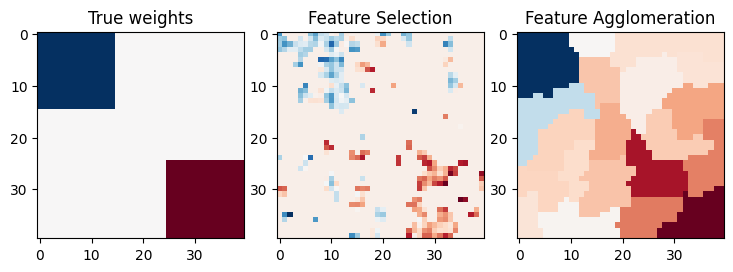

In [24]:
plt.close("all")
plt.figure(figsize=(7.3, 2.7))
plt.subplot(1, 3, 1)
plt.imshow(coef, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("True weights")
plt.subplot(1, 3, 2)
plt.imshow(coef_selection_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Selection")
plt.subplot(1, 3, 3)
plt.imshow(coef_agglomeration_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Agglomeration")
plt.subplots_adjust(0.04, 0.0, 0.98, 0.94, 0.16, 0.26)
plt.show()

Kode di atas membuat tiga subplot yang menampilkan gambar-gambar berikut:

1. Subplot pertama menampilkan gambar koefisien sebenarnya (coef) yang telah ditentukan sebelumnya.

2. Subplot kedua menampilkan gambar koefisien setelah seleksi fitur (coef_selection_) menggunakan teknik F-regression.

3. Subplot ketiga menampilkan gambar koefisien setelah aglomerasi fitur (coef_agglomeration_).

Setiap gambar ditampilkan dengan menggunakan fungsi plt.imshow() dengan interpolasi nearest dan peta warna RdBu_r. Judul-judul subplot sesuai dengan jenis transformasi yang dilakukan pada fitur. Subplot disusun secara horizontal dengan ukuran dan penyesuaian yang sesuai agar terlihat dengan jelas.

# Pengelompokan aglomeratif dengan dan tanpa struktur

In [ ]:
#Import Library
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Masukkan sampel data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

# Gabungkan data sampel menjadi satu array
X = np.concatenate((x, y))
# Tambahkan noise ke data
X += 0.7 * np.random.randn(2, n_samples)
# Transpose array untuk mendapatkan format yang sesuai
X = X.T

# Buat graf yang merepresentasikan keterhubungan lokal antar data.
# Jumlah tetangga yang lebih besar akan memberikan klaster yang lebih homogen
# namun meningkatkan waktu komputasi. Jumlah tetangga yang sangat besar
# memberikan ukuran klaster yang lebih merata, tetapi mungkin tidak
# merepresentasikan struktur manifold lokal dari data.
knn_graph = kneighbors_graph(X, 30, include_self=False)

# Untuk setiap nilai dari variabel connectivity (None atau knn_graph)
for connectivity in (None, knn_graph):
    # Untuk setiap jumlah klaster yang berbeda
    for n_clusters in (30, 3):
        # Buat gambar dengan ukuran tertentu
        plt.figure(figsize=(10, 4))
        # Untuk setiap metode linkage
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            # Bagi ruang gambar menjadi 1 baris dan 4 kolom, pilih subplot
            plt.subplot(1, 4, index + 1)
            # Inisialisasi model AgglomerativeClustering dengan parameter yang sesuai
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            # Waktu proses fitting model
            t0 = time.time()
            model.fit(X)
            # Hitung waktu yang dibutuhkan untuk proses fitting
            elapsed_time = time.time() - t0
            # Plot data dengan warna sesuai dengan label klaster yang dihasilkan oleh model
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(waktu %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            # Set axis agar proporsional dan tanpa penanda sumbu
            plt.axis("equal")
            plt.axis("off")

            # Sesuaikan jarak antar subplot
            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            # Judul utama yang menyatakan jumlah klaster dan keterhubungan yang digunakan
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )

# Tampilkan semua plot yang sudah dibuat
plt.show()

Tentu, berikut adalah penjelasan singkat dari alur kode di atas:

1. Pembuatan Data Sampel: Data sampel dihasilkan menggunakan fungsi trigonometri dan ditambahkan dengan noise untuk membuat data lebih realistis.

2. Pembuatan Graf Tetangga: Graf tetangga dibuat untuk menangkap keterhubungan lokal antar titik data. Jumlah tetangga yang lebih besar menghasilkan klaster yang lebih homogen, namun membutuhkan waktu komputasi yang lebih lama.

3. Pembuatan Klaster dengan Metode Agglomerative Clustering: Klaster dibuat menggunakan metode Agglomerative Clustering dengan beberapa variasi parameter seperti jumlah klaster, metode linkage, dan keterhubungan (connectivity).

4. Visualisasi: Data dan klaster yang dihasilkan dari proses klasterisasi ditampilkan dalam subplot dengan warna yang berbeda untuk setiap klaster.

5. Pengulangan: Proses ini diulang untuk berbagai kombinasi jumlah klaster, metode linkage, dan keterhubungan untuk melihat bagaimana hal-hal tersebut mempengaruhi hasil klasterisasi.

6. Tampilan: Semua plot yang dihasilkan ditampilkan dalam satu jendela grafik.